# Linear Regression Programming Exercise

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## warmUpExercise

In [2]:
def warmUpExercise():
    return(np.identity(5))

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Linear regression with one variable

(97, 2)


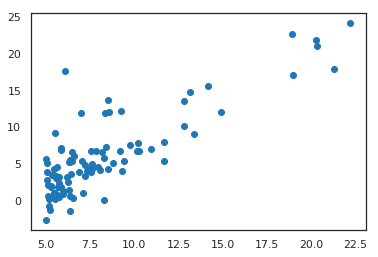

In [4]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
print(data.shape)

X = np.c_[np.ones(data.shape[0]), data[:,0]]
Y = np.c_[data[:,1]]
plt.scatter(X[:,1],Y)

### We have a training set and we want to find the following hypothesis function:
$$\large h_{\theta}(x) = {\theta_0} + {\theta_1}x $$
### We need the theta values which best fit the training data; what we do is to solve this optimization problem:
$$\large min_{\theta_0 , \theta_1} \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2 $$
### where the argument is called (Squared Error) Cost Function $$ J({\theta_0} , {\theta_1}) $$
### Vectorized version:
$$\large J({\theta}) = \frac{1}{2m} (X{\theta} - y)^T(X{\theta} - y) $$

In [5]:
def costFunction(X, y, theta=[[0],[0]]):
    m=y.size
    J=0
    h=X.dot(theta)
    J= 1/(2*m)*(h-y).T.dot(h-y)
    return J

### Let's introduce an algorithm for minimizing the cost function, the Gradient Descent. 
### We start up with an inital guess about the theta parameters then we iterate and we keep changing theta parameters in order to reduce cost function until we reach the local minimum
$$\large {\theta_j} = {\theta_j} - \alpha \frac{\partial J(\theta)}{\partial \theta_j} $$
### with
$$\large \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} $$
### where alpha is called the learning rate and it represents the aggressiveness of the algorithm 
### Vectorized:
$$\large {\theta} = {\theta} - \frac{\alpha}{m} ((X \theta - y)^T X)^T = {\theta} - \frac{\alpha}{m} (X^T (X \theta - y)) $$

In [6]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, n_iter=1500):
    m = y.size
    J = np.zeros(n_iter)
    for i in range(0, n_iter):
        h = X.dot(theta)
        theta = theta - (alpha/m) * ((X.T).dot(h-y))
        J[i] = costFunction(X,y, theta)
    
    return (theta,J)

In [7]:
def plot(X, y, theta=[[0],[0]], alpha=0.01, n_iter=1500):
    theta, cost_J = gradientDescent(X, y, theta, alpha, n_iter)
    plt.plot(cost_J, 'go--', linewidth=2, markersize=4)
    plt.title('Cost Function')
    plt.xlabel('Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    a = np.linspace(4, 23, 100)
    b = theta[0] + theta[1] * a
    plt.plot(a, b, 'r')
    plt.scatter(X[:, 1], y)
    plt.title('Linear Regression')
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    plt.show()

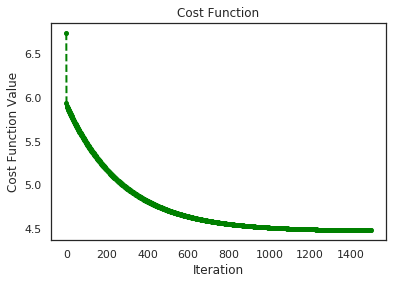

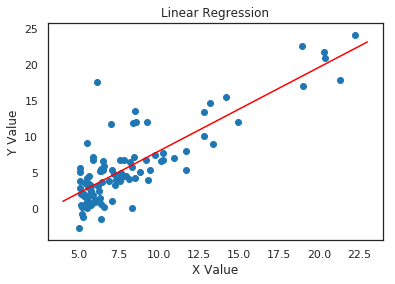

In [8]:
plot(X,Y)

## Thanks to the Gradient Descent algorithm, at each iteration we can see the decrease of the cost function, as we expect. The second plot shows the result achieved after 1500 iteration, a model which can be used to predict new values.

# Now let's try to plot the cost function to the change of one of the most important parameters, the learning rate (alpha).

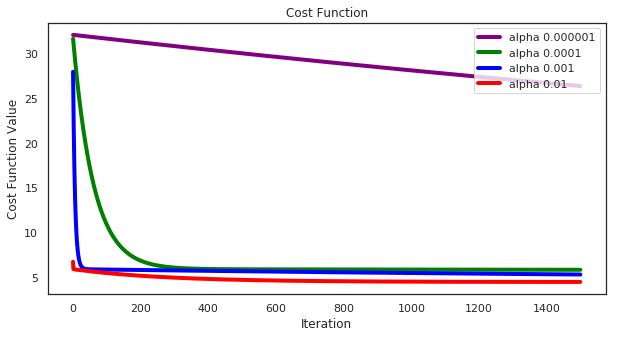

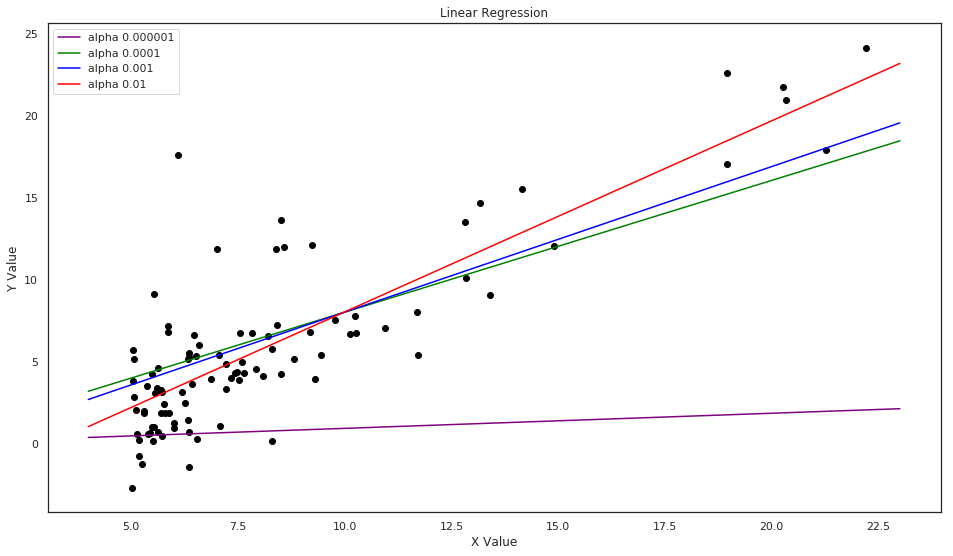

[[-3.63029144]
 [ 1.16636235]]


In [18]:
theta0=[[0],[0]]
theta1=[[0],[0]]
theta2=[[0],[0]]
theta3=[[0],[0]]
alpha0=0.000001
alpha1=0.0001
alpha2=0.001
alpha3=0.01
n_iter=1500
theta0, cost_J0 = gradientDescent(X, Y, theta0, alpha0, n_iter)
theta1, cost_J1 = gradientDescent(X, Y, theta1, alpha1, n_iter)
theta2, cost_J2 = gradientDescent(X, Y, theta2, alpha2, n_iter)
theta3, cost_J3 = gradientDescent(X, Y, theta3, alpha3, n_iter)
plt.figure(figsize=(10,5))
plt.plot(cost_J0, 'purple', linewidth=4, markersize=4, label='alpha 0.000001')
plt.plot(cost_J1, 'g', linewidth=4, markersize=4, label='alpha 0.0001')
plt.plot(cost_J2, 'b', linewidth=4, markersize=4, label='alpha 0.001')
plt.plot(cost_J3, 'r', linewidth=4, markersize=4, label='alpha 0.01')
plt.title('Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.legend(loc=1)
plt.show()

a = np.linspace(4, 23, 100)
b = theta0[0] + theta0[1] * a
c = theta1[0] + theta1[1] * a
d = theta2[0] + theta2[1] * a
e = theta3[0] + theta3[1] * a
plt.figure(figsize=(16,9))
plt.plot(a, b, 'purple', label='alpha 0.000001')
plt.plot(a, c, 'g', label='alpha 0.0001')
plt.plot(a, d, 'b', label='alpha 0.001')
plt.plot(a, e, 'r', label='alpha 0.01')
plt.scatter(X[:, 1], Y, color='black')
plt.title('Linear Regression')
plt.legend(loc=2)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()

## These plots shows the importance of this parameter, in fact alpha represents the learning level in our model; smaller alpha leads to less learning, then we need more iterations in order to converge with the iterative algorithm, the gradient descent.

# Now let's observe the behavior of our model with different initial guesses and a fixed learning rate and number of iterations

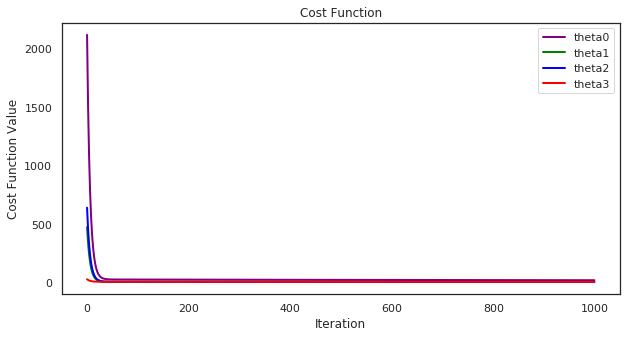

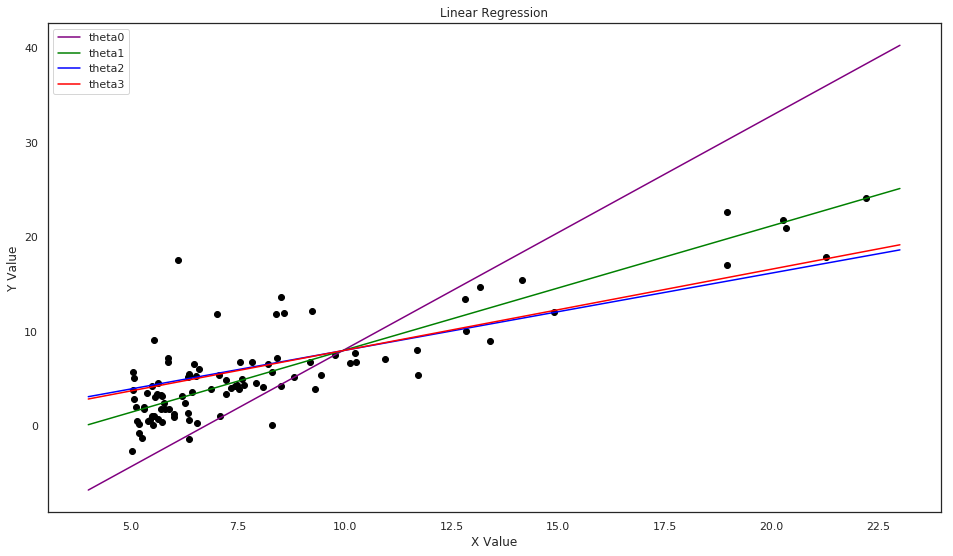

In [28]:
theta0=[[-20],[-5]]
theta1=[[-5],[5]]
theta2=[[1],[5]]
theta3=[[0],[0]]
alpha=0.001
n_iter=1000
theta0, cost_J0 = gradientDescent(X, Y, theta0, alpha, n_iter)
theta1, cost_J1 = gradientDescent(X, Y, theta1, alpha, n_iter)
theta2, cost_J2 = gradientDescent(X, Y, theta2, alpha, n_iter)
theta3, cost_J3 = gradientDescent(X, Y, theta3, alpha, n_iter)
plt.figure(figsize=(10,5))
plt.plot(cost_J0, 'purple', linewidth=2, markersize=4, label='theta0')
plt.plot(cost_J1, 'g', linewidth=2, markersize=4, label='theta1')
plt.plot(cost_J2, 'b', linewidth=2, markersize=4, label='theta2')
plt.plot(cost_J3, 'r', linewidth=2, markersize=4, label='theta3')
plt.title('Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.legend(loc=1)
plt.show()

a = np.linspace(4, 23, 100)
b = theta0[0] + theta0[1] * a
c = theta1[0] + theta1[1] * a
d = theta2[0] + theta2[1] * a
e = theta3[0] + theta3[1] * a
plt.figure(figsize=(16,9))
plt.plot(a, b, 'purple', label='theta0')
plt.plot(a, c, 'g', label='theta1')
plt.plot(a, d, 'b', label='theta2')
plt.plot(a, e, 'r', label='theta3')
plt.scatter(X[:, 1], Y, color='black')
plt.title('Linear Regression')
plt.legend(loc=2)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()

## The result is that the global minimum is reached under different iterations but the purple model needs more iterations because it starts farther than the other models.
## This behavior is explained by the convexity of the function that leads to a contour plot as a bowl. A bowl-shaped function has only one optimum which is global (Contour plot shown later).

# New value prediction

In [26]:
theta, cost_J = gradientDescent(X, Y)
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


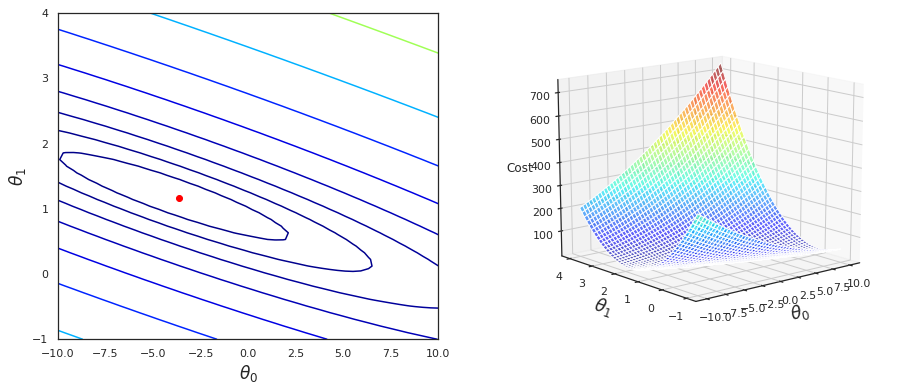

In [27]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = costFunction(X,Y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)